In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("delhiaqi.csv")
df.head()

,date,co,no,no2,o3,so2,pm2_5,pm10,nh3
0,2023-01-01 00:00:00,1655.58,1.66,39.41,5.90,17.88,169.29,194.64,5.83
1,2023-01-01 01:00:00,1869.20,6.82,42.16,1.99,22.17,182.84,211.08,7.66
2,2023-01-01 02:00:00,2510.07,27.72,43.87,0.02,30.04,220.25,260.68,11.40
3,2023-01-01 03:00:00,3150.94,55.43,44.55,0.85,35.76,252.90,304.12,13.55
4,2023-01-01 04:00:00,3471.37,68.84,45.24,5.45,39.10,266.36,322.80,14.19


In [3]:
df.isnull().sum()

date     0
co       0
no       0
no2      0
o3       0
so2      0
pm2_5    0
pm10     0
nh3      0
dtype: int64

In [4]:
df.shape

(561, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561 entries, 0 to 560
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    561 non-null    object 
 1   co      561 non-null    float64
 2   no      561 non-null    float64
 3   no2     561 non-null    float64
 4   o3      561 non-null    float64
 5   so2     561 non-null    float64
 6   pm2_5   561 non-null    float64
 7   pm10    561 non-null    float64
 8   nh3     561 non-null    float64
dtypes: float64(8), object(1)
memory usage: 39.6+ KB


In [6]:
# Correlation analysis
correlation_matrix = df.corr()
print("\nCorrelation Matrix:\n", correlation_matrix)


Correlation Matrix:
              co        no       no2        o3       so2     pm2_5      pm10  \
co     1.000000  0.969740  0.776402 -0.463082  0.716831  0.953083  0.966801   
no     0.969740  1.000000  0.702201 -0.377813  0.734503  0.888810  0.903339   
no2    0.776402  0.702201  1.000000 -0.407177  0.734961  0.698696  0.720050   
o3    -0.463082 -0.377813 -0.407177  1.000000 -0.049158 -0.450458 -0.468477   
so2    0.716831  0.734503  0.734961 -0.049158  1.000000  0.648996  0.658325   
pm2_5  0.953083  0.888810  0.698696 -0.450458  0.648996  1.000000  0.994088   
pm10   0.966801  0.903339  0.720050 -0.468477  0.658325  0.994088  1.000000   
nh3    0.826299  0.823638  0.700254 -0.299663  0.843635  0.720303  0.754468   

            nh3  
co     0.826299  
no     0.823638  
no2    0.700254  
o3    -0.299663  
so2    0.843635  
pm2_5  0.720303  
pm10   0.754468  
nh3    1.000000  


C:\Users\MOHD OSAMA\AppData\Local\Temp\ipykernel_11268\3852910523.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


## Here we can see the most correlated pollutent fields

Maximum of PM 2.5 pollutent date     2023-01-19 17:00:00
pm2_5                 1310.2
Name: 449, dtype: object


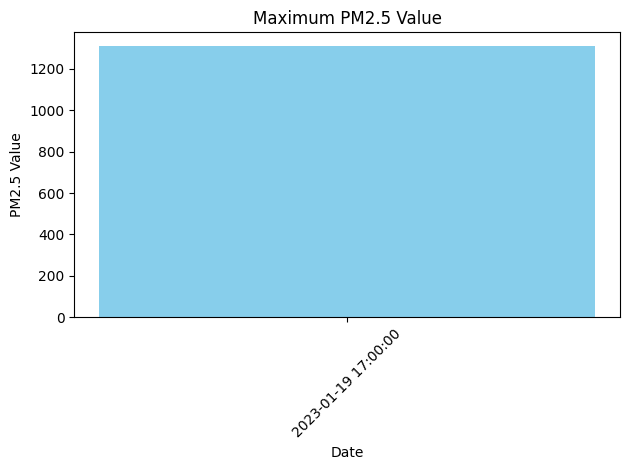

In [29]:
max_value_row = df.loc[df['pm2_5'].idxmax(), ['date', 'pm2_5']]
date = max_value_row['date']
value = max_value_row['pm2_5']
print(max_value_row)
# Create a bar chart
plt.bar(date, value, color='skyblue')
plt.xlabel('Date')
plt.ylabel('PM2.5 Value')
plt.title('Maximum PM2.5 Value')
plt.xticks(rotation=45)  # Rotate the date label for better visibility
plt.tight_layout()
plt.show()

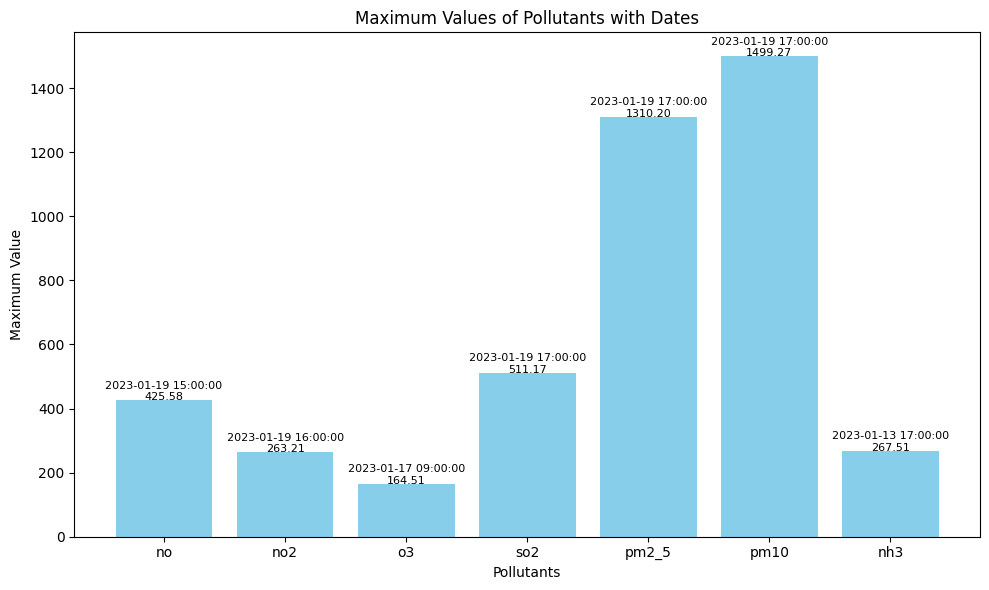

In [26]:
# List of pollutants
pollutants = [ 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3']

# Find the maximum values and corresponding dates for all pollutants
max_values = []
dates = []

for pollutant in pollutants:
    max_row = df.loc[df[pollutant].idxmax(), ['date', pollutant]]
    max_values.append(max_row[pollutant])  # Append the max value
    dates.append(max_row['date'])          # Append the corresponding date

# Create a bar chart for maximum values
plt.figure(figsize=(10, 6))
plt.bar(pollutants, max_values, color='skyblue')

# Annotate the bars with corresponding dates
for i, (value, date) in enumerate(zip(max_values, dates)):
    plt.text(i, value + 0.5, f"{date}\n{value:.2f}", ha='center', fontsize=8)

# Add labels and title
plt.xlabel('Pollutants')
plt.ylabel('Maximum Value')
plt.title('Maximum Values of Pollutants with Dates')
plt.tight_layout()
plt.show()


## As we can see hare that most of the high pollutent is found between from date 17-Jan-2023 to 19-Jan-2023 
### PM 2.5 and PM 10 are maximum at 19-Jan-2023 at 5 P.M

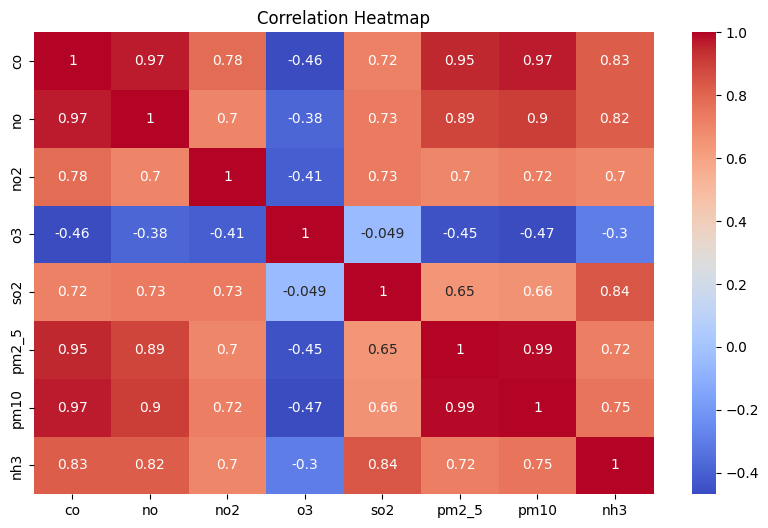

In [8]:
# Visualization: Heatmap of correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

#### *The high positive correlations between co, no, pm2_5, and pm10 suggest that these pollutants likely originate from similar sources, such as vehicle emissions or industrial activities.
#### *The negative correlation of o3 with other pollutants like co and no highlights the different dynamics of ozone formation, possibly due to photochemical reactions.
#### *Strategies to improve air quality should focus on reducing the sources of co, no, and pm2_5, as they are strongly interconnected and might lead to widespread pollution.

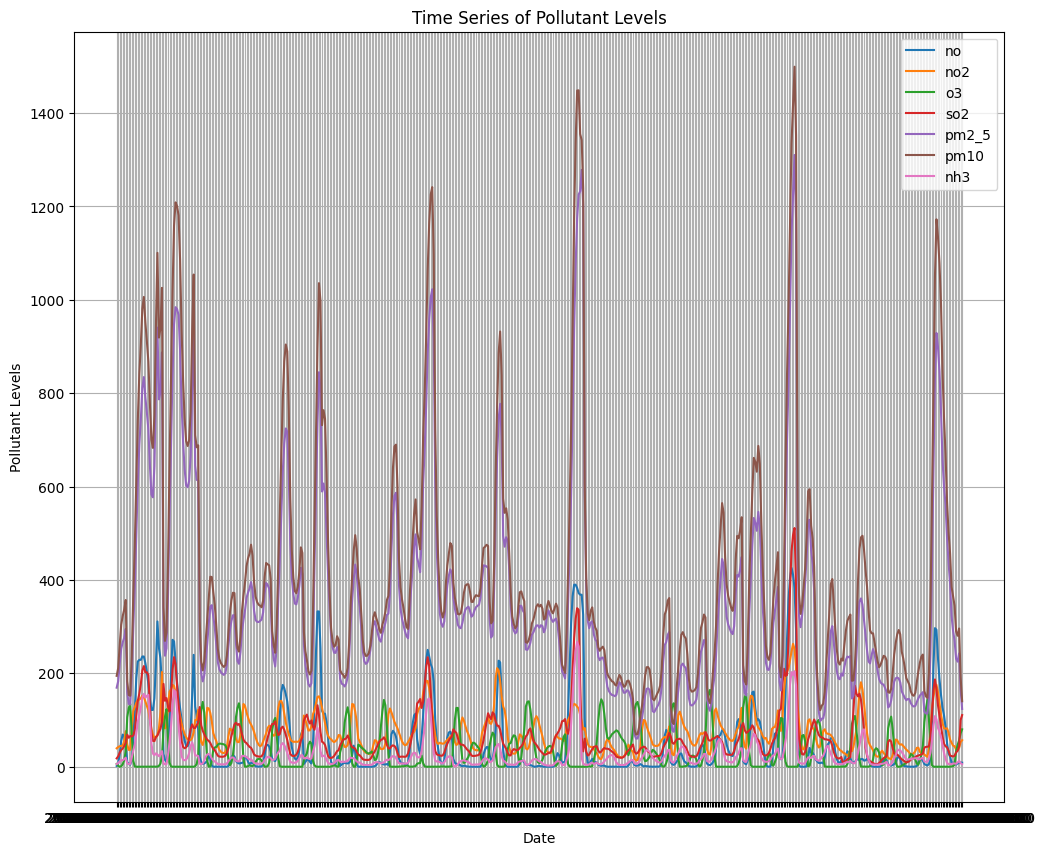

In [9]:
# Visualization: Time series for key pollutants
plt.figure(figsize=(12, 10))
for pollutant in ['no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3']:
    plt.plot(df['date'], df[pollutant], label=pollutant)

plt.xlabel("Date")
plt.ylabel("Pollutant Levels")
plt.title("Time Series of Pollutant Levels")
plt.legend()
plt.grid()
plt.show()

## By Analysing the time series graph we can easily see that most polluted day are 13-January-2023 and 19-January-2023

date     2023-01-19 17:00:00
pm2_5                 1310.2
Name: 449, dtype: object


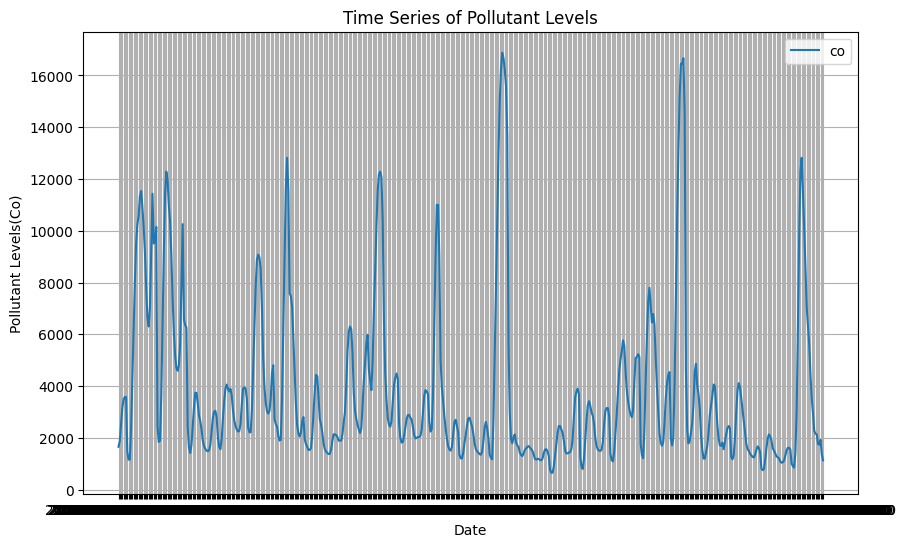

In [24]:
# Visualization: Time series for key pollutants
plt.figure(figsize=(10, 6))
for pollutant in ['co']:
    plt.plot(df['date'], df[pollutant], label=pollutant)
print(df.loc[df['pm2_5'].idxmax(), ['date', 'pm2_5']])
plt.xlabel("Date")
plt.ylabel("Pollutant Levels(Co)")
plt.title("Time Series of Pollutant Levels")
plt.legend()
plt.grid()
plt.show()

## Pollutent Carbon Monooxide(CO) is also maximum at 5 PM on 19-Jan-2023

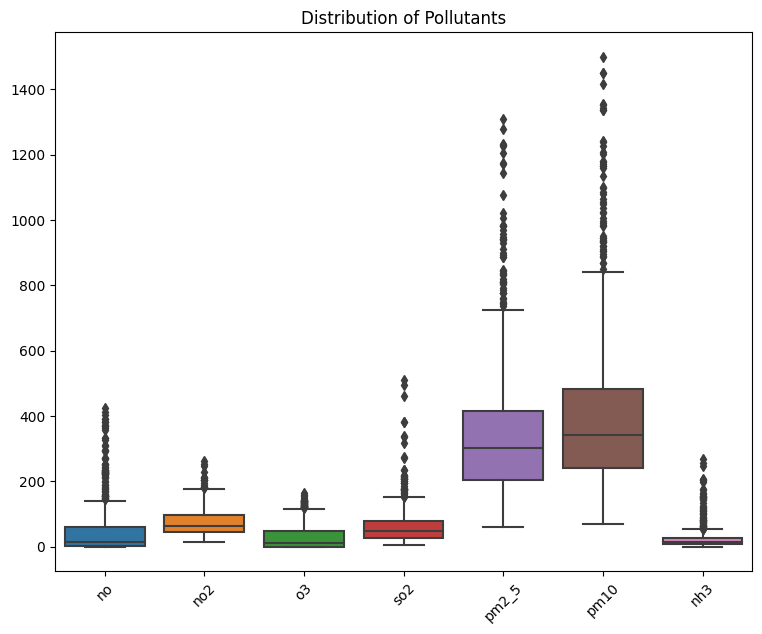

In [31]:
# Boxplot: Distribution of pollutants
plt.figure(figsize=(9, 7))
sns.boxplot(data=df[[ 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3']])
plt.title("Distribution of Pollutants")
plt.xticks(rotation=45)
plt.show()

### Focus air quality control measures on reducing particulate matter (PM) as they are the most problematic pollutants.
### Investigate sources of outliers for nitrogen oxides (NOx) and sulfur dioxide (SO2) to prevent episodic spikes.
### Regular monitoring and analysis of ozone (O3) trends can ensure it remains under control.

## To reduce air pollution in Delhi, several measures can be taken:

#### 1. Promote Electric Vehicles (EVs): Encourage the use of EVs by offering incentives and expanding charging infrastructure.
#### 2. Improve Public Transport: Enhance the availability and reliability of public transport to reduce private vehicle usage.
#### 3. Strict Emission Regulations: Enforce tighter emissions standards for industries and vehicles, and penalize violators.
#### 4. Green Spaces and Tree Planting: Increase urban green spaces and tree planting to absorb pollutants.
#### 5. Waste Management: Improve waste disposal and management to reduce open burning, a significant source of pollution.
#### 6. Address Crop Residue Burning: Promote stubble recycling and alternatives to reduce burning in Punjab, which worsens Delhi's air pollution.
#### 7. Control Construction Dust: Implement measures to control dust from construction sites, such as using water sprays and netting.
#### 8. Public Awareness Campaigns: Educate citizens on reducing personal emissions and adopting eco-friendly practices.